# Definite Integrals
The definite integral of a function $f(x)$ over an interval $[a,b]$, is the limit
$$\int_{a}^{b}f(x)dx= \lim_{N \rightarrow \infty} \sum_{i=1}^{N} f(x_{i}^{*})(x_{i}-x_{i-1}), x_{i}^{*} \in [x_{i-1}, x_{i}] $$
where, for each $N$, 
$$x_{0}=a<x_{1}<\cdots < x_{N} =b$$
is a partiton of $[a,b]$ with $N$ subintervals and the values $x_{i}^{*} \in [x_{i-1}, x_{i}]$ chosen in each subinterval arbitrary.

The definite integral represents the (net) area under the curve of the graph of $ y=f(x) $ on the interval $[a,b]$.
$$\int_{a}^{b}f(x)dx=\text{(net) area under the curve} \quad y =f(x) \quad \text{on} \quad [a,b]$$

The ter "net" means that area above the $x$-axis is positive and the area under the $x$-axis coutns as negative area. For example, we can visualize the integral:
$$\int_{\pi/2}^{3\pi/2}\left(\sin(0.2x) + \sin(2x) + 1\right) dx

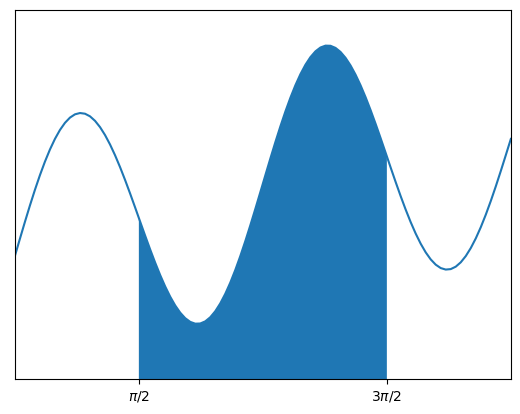

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(0.2*x) + np.sin(2*x) + 1

x = np.linspace(0, 2* np.pi, 100)
y = f(x)
plt.plot(x, y)

X = np.linspace(np.pi/2, 3*np.pi/2, 100)
Y = f(X)
plt.fill_between(X, Y)
plt.xticks([np.pi/2, 3*np.pi/2], ['$\pi/2$', '$3\pi/2$']) ; plt.yticks([])
plt.xlim([0, 2*np.pi]); plt.ylim([0,3]);
plt.show()

In our introductory calculus courses, we focus on integrals which we can solve exactly by the Fundamental Theorem of Calculus such as 
$$\int_{0}^{\pi/2} \cos{x}dx = \sin{\pi/2} - \sin{0} = 1$$
However, most definite integrals are impossible to solve exactly. For example, the famous error function in probability $$erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{\infty}e^{-t^{2}}dt$$
is a definite integral for which tehre is no explicit formula.

The idea behind numerical integration is to use simple geometric shapes to approximate the area under the curve $y=f(x)$ to setimate definite integrals. In this section, we explore the simplest methods of numerical integration: Riemann sums, the trapezoid rule and Simpson's rule.

## Riemann Sums

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Definition
A Riemann sum of a function $f(x)$ over a partition $$x_{0}=a<x_{1}<\cdots < x_{N-1} <x_{n} =b$$
is a sum of the form $$\sum_{i=1}^{N}f(x_{i}^{*})(x_{i}-x_{i-1}), x_{i}^{*} \in [x_{i-1}, x_{i}]$$ where each value $x_{i}^{*} \in [x_{i-1},x_{i}]$ in each subinterval is arbitrary.

Riemann sums are important because they provide an easy way to approximate a definite integral $$\int_{a}^{b}f(x)dx \approx \sum_{i=1}^{N} f(x_{i}^{*})(x_{i}-x_{i-1}), x_{i}^{*} \in [x_{i-1},x_{i}]$$

Notice that the product $f(x_{i}^{*})(x_{i}-x_{i-1})$ for each i is the area of a rectangle of height $f(x_{i}^{*})$ and width $x_{i}-x_{i-1}$. We can think of a Riemann sum as the area of
$N$ rectangles with heights determined by the graph of $y=f(x)$.

The value $x_{i}^{*}$ chosen in each subinterval is arbitrary however there are certain obvious choices:
* A *left* Riemann sum is when each $x_{i}^{*}=x_{i-1}$ is the left endpoint of the subinterval $[x_{i-1},x_{i}]$
* A *right* Riemann sum is when each $x_{i}^{*}=x_{i}$ is the right endpoint of the subinterval $[x_{i-1},x_{i}]$
* A *midpoint* Riemann sum is when each $x_{i}^{*}=\left(x_{i-1}+x_{i}\right)/2$ is the left endpoint of the subinterval $[x_{i-1},x_{i}]$


Let's visualize rectangles in the left, right and midpoint Riemann sums for the function $$f(x)=\frac{1}{1+x^{2}}$$ over the interval $[0,5]$ with a partition of size $N=10$.

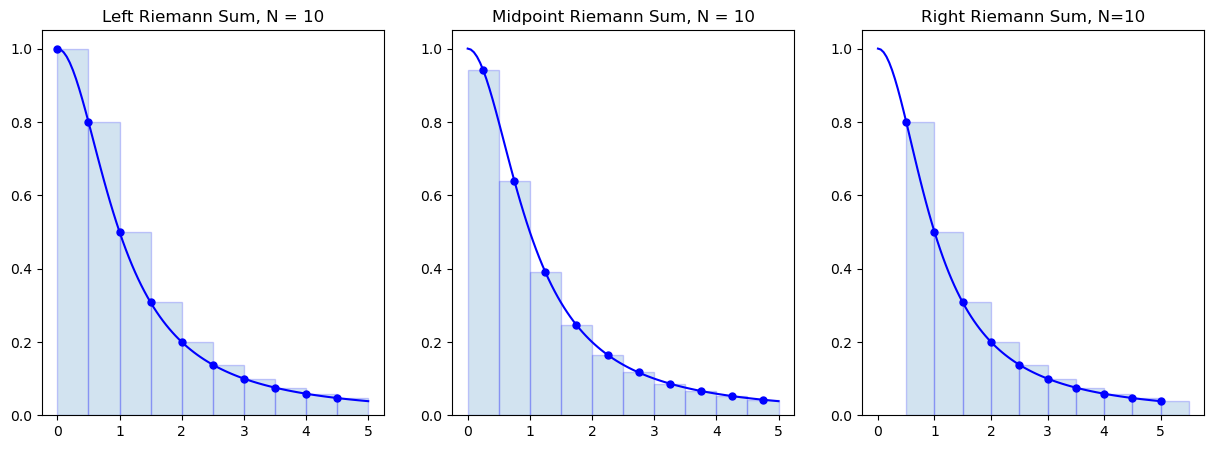

In [ ]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10  # Use n*N+1 points to plot the function smoothly

x = np.linspace(a, b, N+1)
y = f(x)

X = np.linspace(a, b, n*N+1)
Y = f(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(X, Y, 'b')
x_left = x[:-1] ; y_left = y[:-1]       #Left endpoints
plt.plot(x_left, y_left, 'b.', markersize = 10)
plt.bar(x_left, y_left, width=(b-a)/N, alpha=0.2, align='edge', edgecolor = 'b')
plt.title("Left Riemann Sum, N = {}".format(N))

plt.subplot(1, 3, 2)
plt.plot(X, Y, 'b')
x_mid = (x[:-1]+x[1:])/2 ; y_mid = f(x_mid)       #midpoints
plt.plot(x_mid, y_mid, 'b.', markersize = 10)
plt.bar(x_mid, y_mid, width=(b-a)/N, alpha=0.2, edgecolor='b')
plt.title("Midpoint Riemann Sum, N = {}".format(N))

plt.subplot(1, 3, 3)
plt.plot(X, Y, 'b')
x_right = x[1:] #Right endpoints
y_right = y[1:]
plt.plot(x_right, y_right, 'b.', markersize = 10)
plt.bar(x_right, y_right, width=(b-a)/N, alpha=0.2, align='edge', edgecolor='b')
plt.title("Right Riemann Sum, N={}".format(N))

plt.show()

Notice that when the function $f(x)$ is decreasing on $\left[a,b \right]$ the left endpoints give an overestimate of the integral $\int_{a}^{b}f(x)dx$ and right endpoints give an underestimate. The oppostite is true is when the function is increasing.

Let's compute the value of each of the Riemann sums:

In [7]:
dx = (b-a)/N
x_left = np.linspace(a, b-dx, N)
x_midpoint = np.linspace(dx/2, b-dx/2, N)
x_right = np.linspace(dx, b, N)

print("Partition with", N, "subintervals.")
left_riemann_sum = np.sum(f(x_left)*dx)
print("Left Riemann sum:", left_riemann_sum)
# print(x_left)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:", midpoint_riemann_sum)
# print(x_midpoint)

right_riemann_sum = np.sum(f(x_right)*dx)
print("Right Riemann Sum:", right_riemann_sum)
# print(x_right)

Partition with 10 subintervals.
Left Riemann sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


We know the exact value $$\int_{0}^{5} \frac{1}{1+x^{2}}dx = \arctan{5}$$ and we can compare the Riemann sums to the value

In [8]:
I = np.arctan(5)
print(I)

1.373400766945016


In [9]:
print("Left Riemann Sum Error:", np.abs(left_riemann_sum - I))
print("Midpoint Riemann Sum:", np.abs(midpoint_riemann_sum - I))
print("Right Riemann Sum:", np.abs(right_riemann_sum - I))


Left Riemann Sum Error: 0.24008792966970915
Midpoint Riemann Sum: 0.00014266137164820059
Right Riemann Sum: 0.24068130109952168


### Error Formulas
A Riemann sum is an approximation of a definite integral. A natural question arises: how good of an approximation is a Riemann sum?

**Theorem.** Let $L_{N}(f)$ denote the left Riemann sum $$L_{N}(f) = \sum_{i=1}^{N} f(x_{i-1})\Delta x$$
where $\Delta = (b-a)/N$ and $x_{i} = a+i\Delta x$. The error bound is $$E_{N}^{L} = \left| \int_{a}^{b} f(x)dx - L_{N}(f)\right| \leq \frac{\left(b-a\right)^{2}}{2N}K_{1}$$
where $\left|f^{\prime}(x)\right| \leq K_{1}$ for all $x \in \left[a,b\right]$.

**Theorem.** Let $R_{N}(f)$ denote the right Riemann sum $$R_{N}(f) = \sum_{i=1}^{N}f(x_{i})\Delta x$$
where $\Delta x = (b-a)/N$ and $x_{i} = a+i\Delta x$. The error bound is $$E_{N}^{R} = \left| \int_{a}^{b} f(x)dx - R_{N}(f)\right| \leq \frac{\left(b-a\right)^{2}}{2N}K_{1}$$
where $\left|f^{\prime}(x)\right| \leq K_{1}$ for all $x \in \left[a,b\right]$.

**Theorem.** Let $M_{N}(f)$ denote the midpoint Riemann sum $$ M_{N}(f) = \sum_{i=1}^{N}f(x_{i}^{*})\Delta x$$
where $\Delta x = (b-a)/N$ and $x_{i}^{*} = (x_{i-1}+x_{i})/2$ for $x_{i}=a+i \Delta x$. The error bound is 
$$E_{N}^{M} = \left| \int_{a}^{b} f(x)dx - M_{N}(f)\right| \leq \frac{\left(b-a\right)^{3}}{24N^{2}}K_{2}$$
where $\left|f^{\prime\prime} (x)\right| \leq K_{2} $ for all $x \in \left[a, b \right]$.



There are several points to notice:
* Left and right Riemann sums have the same error bound which depends on the first derivative $f^{\prime}$.
* Midpoint Riemann sum error bound depends on the second derivative $f^{\prime \prime}(x)$.
* We expect the midpoint Riemann sum to give a better approximation as $N \rightarrow \infty$ since its error bound is inversely propotional to $N^{2}$ but left/right riemann sum error bound is inversely proportional only to $N$.

### Implementation
Let's write a function called `riemann_sum` which takes 5 input parameters `f`, `a`, `b`, `N` and `method` and returns the Riemann sum $$\sum_{i=1}^{N}f(x_{i}^{*})\Delta x$$
where $\Delta = (b-a)/N$ and $x_{i}= a+i\Delta x$ defines a partition with $N$ subintervals of equal length, and `method` determines whether we use left endpoints, right endpoints or midpoints(with midpoints as the default method).

In [10]:
def riemann_sum(f, a, b, N, method='midpoint'):

    dx = (b-a)/N
    x = np.linspace(a, b, N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)

    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)

    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)

    else:
        raise ValueError("Type 'left', 'right' or 'midpoint'.")
    

Let's test our function with inputs where we know exactly what the output should be. For example, we know $$\int_{0}^{\pi/2} \sin{x} dx = 1$$
and, since $\sin{x}$ is increasing on $\left[0, \pi/2 \right]$, we know that left endpoints will give an under-estimate, and right endpoints will give an over-estimate.

In [11]:
riemann_sum(np.sin, 0, np.pi/2, 100)

1.0000102809119054

In [12]:
riemann_sum(np.sin, 0, np.pi/2, 100, 'right')

1.007833419873582

In [13]:
riemann_sum(np.sin, 0, np.pi/2, 100, 'left')

0.992125456605633

We also know that $\int_{0}^{1} x dx = \frac{1}{2}$ and midpoint should give the result exactly for any $N$:

In [14]:
riemann_sum(lambda x: x, 0, 1, 1)

0.5

### Examples

#### Approximate Pi
Find a value $N$ which guarantees the right Riemann sum of $f(x)=\frac{4}{1+x^{2}}$ over \left[0,1\right] is within $10^{-5}$ of the exact value
$$\int_{0}^{1}\frac{4}{1+x^{2}}dx = \pi$$
Compute $$f^{\prime} = - \frac{8x}{\left(1+x^{2}\right)^{2}}$$
Find a bound on $\left|f^{\prime}(x)\right| on \left[0, 1\right]:

In [15]:
x = np.linspace(0, 1, 1000)
y = np.abs(-8*x/(1+x**2)**2)
np.max(y)

2.5980759093919907

Therefore, $\left|f^{\prime}(x)\right| \leq 2.6$ for $x \in \left[0,1\right]$. Use the error bound
$$\frac{\left(b-a\right)^{2}}{2N}K_{1}\leq 10^{-5} \Rightarrow \frac{1.3}{N} \leq 10^{-5} \Rightarrow 130000 \leq N$$
Let's compute the right Riemann sum for $N=130000$:

In [16]:
approximation = riemann_sum(lambda x : 4/(1+x**2), 0, 1, 130000, method='right')
print(approximation)

3.1415849612722386


Verify the accuracy of the approximation

In [17]:
print(np.abs(approximation - np.pi)< 1e-5)
print(np.abs(approximation - np.pi))

True
7.692317554486294e-06


#### Approximate ln(2)
Find a value $N$ which guarantees the midpoint Riemann sum of $f(x) = \frac{1}{x}$ over $\left[1, 2\right]$ is within $10^{-8}$ of the exact value
$$\int_{1}^{2}\frac{1}{x} =\ln{2}$$

Compute $$f^{\prime \prime} = \frac{2}{x^{3}}$$
Since $f^{\prime \prime}$ is decreasing for all $x > 0$ we have $\left|f^{\prime \prime} \right| \leq 2$ for all $x\in \left[1, 2\right]$. Use the error bound:
$$\frac{\left(b-a\right)^{3}}{24N^{2}}K_{2} \leq 10^{-8} \Rightarrow \frac{1}{12N^{2}}\leq 10^{-8} \Rightarrow \frac{10^{4}}{\sqrt{12}}\leq N$$

In [20]:
(10**4) /np.sqrt(12)

2886.751345948129

Therfore a partition of size $N = 2887$ guarantees the desired accuracy:

In [21]:
approximation = riemann_sum(lambda x: 1/x, 1, 2 ,2887, method='midpoint')
print(approximation)

0.6931471768105913


Verify the accuracy of the approximation:

In [23]:
print(np.abs(approximation - np.log(2)) < 1e-8)
print(np.abs(approximation - np.log(2)))

True
3.7493539384314545e-09


## Trapezoid Rule
### Numerical Quadrature 
Okay, so now we are going to get into one of the biggest reasons we do math on computers, and that is to numerically compute integrals. What we are attempting to do then is , for a given function $f(x)$, find approximations to $$T_{\left[a, b \right]}(f) = \int_{a}^{b} f(x) dx$$

To do this, we first need to introduce the notion of a mesh $\{x_{i} \}^{N}_{j=0}$ where $$x_{0} =a, x_{N} =b, x_{i+1} - x_{i} =\Delta x = \frac{b-a}{N}.$$

#### Trapezoids
The definite integral of $f(x)$ is equal to the (net) area under the curve $y=f(x)$ over the interval $\left[a, b\right]$. Riemann sums approximate definite integrals by using sums of rectangles to approximate the area.

The trapezoid rule gives a better approximation of a definite integral by suming the areas of the trapezoids connecting the points
$$\left(x_{i-1},0\right), \left(x_{i}, 0\right), \left(x_{i-1}, f(x_{i-1})\right), \left(x_{i}, f(x_{i})\right)$$
for each subinterval $\left[ x_{i-1}, x_{i}\right]$ of a partition. Note that the area of each trapezoid is the sum of a rectangle and a triangle
$$\left(x_{i}-x_{i-1}\right)f(x_{i-1}) + \frac{1}{2}\left(x_{i}-x_{i-1}\right) \left(f(x_{i})-f(x_{i-1})\right) = \frac{1}{2}\left(f(x_{i})+f(x_{i-1})\right)\left(x_{i}-x_{i-1}\right)$$
For example, we can use a single trapezoid to approximate: $$\int_{0}^{1}e^{-x^{2}} dx$$
First, let's plot the curve $y = e^{-x^{2}}$ and the trapezoid on the interval $\left[0, 1\right]$:


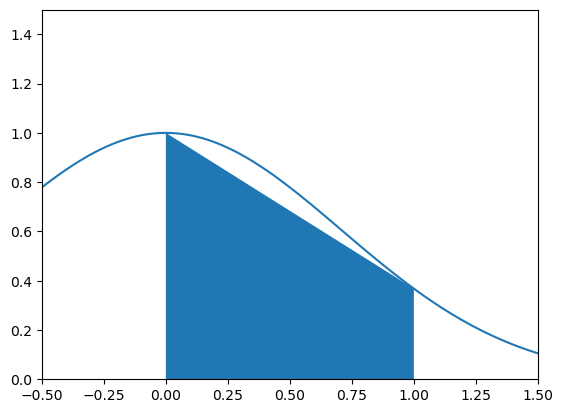

In [25]:
x= np.linspace(-0.5, 1.5, 100)
y = np.exp(-x**2)
plt.plot(x, y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0, x1], [y0, y1])

plt.xlim([-0.5, 1.5]); plt.ylim([0, 1.5]);
plt.show()

Approximate the integral by the area of the trapezoid:

In [26]:
A = 0.5*(y1 + y0)*(x1-x0)
print("Trapezoid area:", A)

Trapezoid area: 0.6839397205857212


##### Definition
The **trapezoid rule** for $N$ subintervals of $\left[a, b\right]$ of equal length is $$T_{N}(f) = \frac{\Delta x}{2}\sum_{i=1}^{N}\left(f(x_{i})+f(x_{i-1})\right)$$
where $\Delta = (b-a)/N$ is the length of the subintervals and x_{i} = a+ i\Delta x$.

Noitce that the trapezoid is the average of the left and right Riemann sums
$$T_{N}(f)=\frac{\Delta x}{2} \sum_{i=1}^{N}\left(f(x_{i})+f(x_{i-1})\right) = \frac{1}{2}\left(\sum_{i=1}^{N}f(x_{i})\Delta x + \sum_{i=1}^{N}f(x_{i-1})\Delta x\right)

##### Error Formula
When computing integrals numerically, it is essentially to know how good our approximations are. Notice in the theorem below that the error formula is inversely proportional to $N^{2}$. This means that the error decreases much faster with larger $N$ compared to Riemann sums.

**Theorem.** Left $T_{N}(f)$ denote the trapezoid rule $$T_{N}(f) = \frac{\Delta x}{2} \sum_{i=1}^{N}\left(f(x_{i})+f(x_{i-1})\right)$$
where $\Delta x = (b-a)/N$ and $x_{i} = a+i \Delta x$. The error bound is 
$$E_{N}(f) = \left| \int_{a}^{b} f(x) dx - T_{N}(f)\right| \leq \frac{\left(b-a\right)^{3}}{12N^{2}}K_{2}$$
where $\left|f^{\prime \prime}(x)\right| \leq K_{2}$ for all $x \in \left[a, b\right]$.

##### Implementation
Let's write a function called `trapz` which takes input parameters $f, a, b$ and $N$ and returns the approximation $T_{N}(f)$. Furthermore, let's assign default value $N=50$.

In [27]:
def trapz(f, a, b, N=50):
    x = np.linspace(a, b, N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] ; y_left = y[:-1] #right, left endpoints
    dx = (b-a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T


Let's test our function on an integral where we know the answer $$\int_{o}^{\pi/2} \sin{x} dx = 1$$

In [28]:
trapz(np.sin, 0, np.pi/2, 1000)

0.9999997943832332

Let's test our function again: $$\int_{0}^{1} 3x^{2}dx =1 $$

In [29]:
trapz(lambda x: 3*x**2, 0, 1, 10000)

1.0000000050000002

And once more: $$\int_{0}{1}xdx=\frac{1}{2}$$

In [30]:
trapz(lambda x : x , 0, 1, 1)

0.5

##### scipy.integrate.trapz
The SciPy subpackage scipy.integrate contains several functions for approximating definite integrals and numerically solving differential equations. Let's import the subpackage under the name `spi`.

In [31]:
import scipy.integrate as spi

The function `scipy.integrate.trapz` computes the approximation of a definite by the trapezoid rule. Consulting the documentation, we see that all we need to do it supply arrays of $x$ and $y$ values for the integrand and `scipy.integrate.trapz` returns the approximation of the integral using the trapezoid rule. The number of points we give `scipy.integrate.trapz`is up to us but we have to remember that more points gives a better approximation but if takes more time to compute!

###### Examples

**Arctangent**
Let's plot the trapezoids for $f(x)=\frac{1}{1+x^{2}}$ on $\left[0, 5\right]$ with $N=10$.

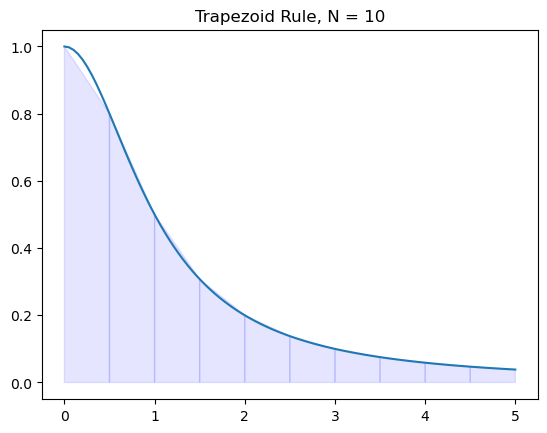

In [33]:
f = lambda x : 1/(1+x**2)
a = 0; b=5; N =10

# x and y values for the trapezoid rule
x = np.linspace(a, b, N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a, b, 100)
Y = f(X)
plt.plot(X, Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0, f(x[i]), f(x[i+1]), 0]
    plt.fill(xs, ys, 'b', edgecolor='b', alpha=0.1)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

Let's compute the sum of areas of the trapezoids:

In [34]:
T = trapz(f, a, b, N)
print(T)

1.3731040812301096


We know the exact value $$\int_{0}^{5} \frac{1}{1+x^{2}} =\arctan{5}$$ and we can compare the trapezoid rule to the value

In [35]:
I = np.arctan(5)
print(I)

1.373400766945016


In [36]:
print("Trapezoid Rule Error:", np.abs(I - T))

Trapezoid Rule Error: 0.00029668571490626405


**Approximate ln(2)**
Find a value $N$ which guarantees that the trapezoid rule approximation $T_{N}(f)$ of the integral $$\int_{1}^{2}\frac{1}{x}dx=\ln{2}$$
satisfies $E_{N}^{T} \leq 10^{-8}$

For $f(x)=\frac{1}{x}$, we compute $f^{\prime \prime}(x)=\frac{2}{x^{3}} \leq 2$ for all $x \in \left[1 ,2 \right]$ therefore the error formula implies
$$\left|\int_{1}^{2}\frac{1}{x} - T_{N}(f)\right| \leq \frac{2}{12N^{2}}$$
Then $E_{N}^{T} \leq 10^{-8}$ is guaranteed if $\frac{1}{6N^{2}} \leq 10^{-8}$ which implies $$\frac{10^{4}}{\sqrt{6}}\leq N$$